# Mushroom Dataset

## Create pandas dataframe

In [231]:
#import modules
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df=pd.read_csv('agaricus-lepiota.data')
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


## Change column names

In [232]:
#change column names
df.columns=["Class", "Cap-Shape", "Cap-Surface", "Cap-Color", "Bruises", "Odor", "Gill-Attachment", "Gill-Spacing", "Gill-Size", "Gill-Color", "Stalk-Shape", "Stalk-Root", "Stalk-Surface-Above-Ring", "Stalk-Surface-Below-Ring", "Stalk-Color-Above-Ring", "Stalk-Color-Below-Ring", "Veil-Type", "Veil-Color", "Ring-Number", "Ring-Type", "Spore-Print-Color", "Population", "Habitat"]
df.head()

,Class,Cap-Shape,Cap-Surface,Cap-Color,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Color,...,Stalk-Surface-Below-Ring,Stalk-Color-Above-Ring,Stalk-Color-Below-Ring,Veil-Type,Veil-Color,Ring-Number,Ring-Type,Spore-Print-Color,Population,Habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


## Cleaning data and wrangling

#### - Check whether all values contain data

In [233]:
df = df.applymap(lambda x: x.replace("'", ""))

#check for missing values
df.isna().sum()

Class                       0
Cap-Shape                   0
Cap-Surface                 0
Cap-Color                   0
Bruises                     0
Odor                        0
Gill-Attachment             0
Gill-Spacing                0
Gill-Size                   0
Gill-Color                  0
Stalk-Shape                 0
Stalk-Root                  0
Stalk-Surface-Above-Ring    0
Stalk-Surface-Below-Ring    0
Stalk-Color-Above-Ring      0
Stalk-Color-Below-Ring      0
Veil-Type                   0
Veil-Color                  0
Ring-Number                 0
Ring-Type                   0
Spore-Print-Color           0
Population                  0
Habitat                     0
dtype: int64

## Create subset with the required columns

#### For this analysis, we use Odor and Habitat

In [235]:
df_subset=df[['Class','Odor','Habitat']]
df_subset.head()

,Class,Odor,Habitat
0,e,a,g
1,e,l,m
2,p,p,u
3,e,n,g
4,e,a,g


## Data Exloration and Analyis

### - Data Distribution

#### 1. Poisonous/Edible vs Odor

Text(0, 0.5, 'Edible/Poisonous')

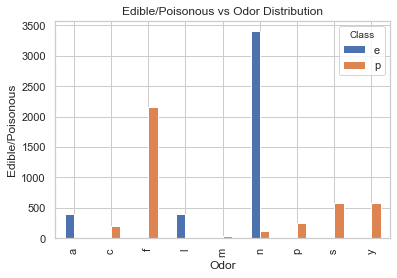

In [211]:
df_group_odor=df_subset.groupby(['Odor','Class'])
ax=df_group_odor.size().unstack().plot.bar()
ax.set_title('Edible/Poisonous vs Odor Distribution')
ax.set_ylabel('Edible/Poisonous')


#### 2. Poisonous/Edible vs Habitat

Text(0, 0.5, 'Edible/Poisonous')

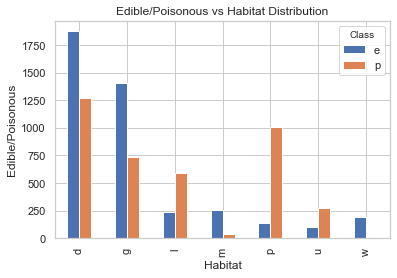

In [236]:
#plot bar graph
df_group_habitat=df_subset.groupby(['Habitat','Class'])
ax=df_group_habitat.size().unstack().plot.bar()
ax.set_title('Edible/Poisonous vs Habitat Distribution')
ax.set_ylabel('Edible/Poisonous')


## Preprocessing data  
### - Replace the codes used in the data with numeric values

In [238]:
le = preprocessing.LabelEncoder()
# Replace the codes used in the data with numeric values using labelencoder
df_subset.iloc[:,0]=le.fit_transform(df_subset.iloc[:,0])
df_subset.iloc[:,1]=le.fit_transform(df_subset.iloc[:,1])
df_subset.iloc[:,2]=le.fit_transform(df_subset.iloc[:,2])

df_subset.head()

,Class,Odor,Habitat
0,0,0,1
1,0,3,3
2,1,6,5
3,0,5,1
4,0,0,1


## Train the algorithm on training data and predict using the testing data


###  1. Edible/Poisonous vs Odor

#### - Accuracy Score

In [239]:
aim=df_subset.Class
data=df_subset[['Odor']]

#split data into test and train
data_train_o, data_test_o, target_train_o, target_test_o = train_test_split(data, aim, test_size = 0.25, random_state = 10)

gb = GaussianNB()

prediction = gb.fit(data_train_o, target_train_o).predict(data_test_o)
accuracy_s=accuracy_score(target_test_o, prediction, normalize = True)
#show the accuracy score
print("Accuracy : {} for Edible/Poisonous vs Odor".format(accuracy_s))


Accuracy : 0.8941408173313639 for Edible/Poisonous vs Odor


#### Accuracy is 89.4% for Edible/Poisonous using Odor Data

   #### - Scatter Plot for Edible/Poisonous vs Odor

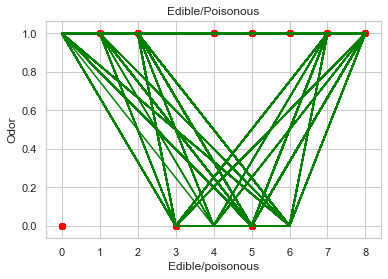

In [240]:
plt.scatter(data_train_o, target_train_o, color = "red")
plt.plot(data_train_o, gnb.predict(data_train_o), color = "green")
plt.title("Edible/Poisonous")
plt.xlabel("Edible/poisonous")
plt.ylabel("Odor")
plt.show()

### 2. Edible/Poisonous vs Habitat

#### - Accuracy Score

In [241]:
aim=df_subset.Class
data=df_subset[['Habitat']]

#split data into test and train
data_train_h, data_test_h, target_train_h, target_test_h = train_test_split(data, aim, test_size = 0.25, random_state = 10)

gb = GaussianNB()

pred = gb.fit(data_train_h, target_train_h).predict(data_test_h)
accuracy_s=accuracy_score(target_test_h, pred, normalize = True)
#show the accuracy score
print("Accuracy : {} for Edible/Poisonous vs Habitat".format(accuracy_s))


Accuracy : 0.5888724766125062 for Edible/Poisonous vs Habitat


#### Accuracy is 58.89% for Edible/Poisonous using Habitat Data

#### - Scatter Plot

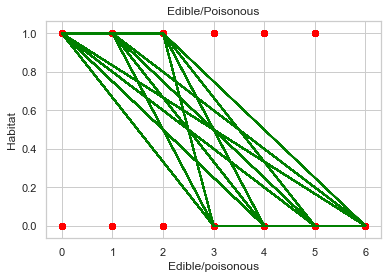

In [242]:
plt.scatter(data_train_h, target_train_h, color = "red")
plt.plot(data_train_h, gnb.predict(data_train_h), color = "green")
plt.title("Edible/Poisonous")
plt.xlabel("Edible/poisonous")
plt.ylabel("Habitat")
plt.show()

## Conclusion

- Using the Naive Bayes model, the odor is a predominant factor in evaluation whether a mushroom is edible. It has an accuracy of 89.4% while the habitat has an accuracy of 58.89%